# DSCI 100 Group Project -- Predicting Price of Car via Horsepower and Peak RPM 🚗

## Developed by Aadi Kanwar, Stella Williams, Satvika Suresha, and Julian Piezas

## Introduction

Yearly income is often thought to be heavily attributed to one's level of education, age, hours worked per week, and even gender, and our group wishes to explore there relations between the aforementioned factors and yearly income. Our group has decided to analyze a dataset containing various categorical and numerical facts about individuals (education, age, gender, hours worked per week, occupation, and yearly income, most importantly), classifying the yearly income categorically as either ">50K" or "<=50K". The individual's income is essentially classified to be above or below %50000 per year (whether the currency is CAD or USD is not specified in the given dataset). Papers such as [this one, by Tolley and Olsen]("https://www.journals.uchicago.edu/doi/pdf/10.1086/259763"), describe there to be a clear interdependence between education and yearly income, and papers such as [this one, by Bick, Shundeln, and Lagakos]("https://www.aeaweb.org/articles?id=10.1257/aer.20151720"), demonstrate their insight on how yearly income changes with the number of hours worked. Our project attempts to support or refute the claims made in papers as such, via KNN classification on different feature's of individuals; predicting whether or not their income is above 50000 dollars. As such, our predictive question becomes: "Given the factors used to classify individual income in the dataset, will an unknown person working between 20-50 hours per week attain an income of above or below $50000?" Our dataset is described above and can be found directly [here]("https://archive.ics.uci.edu/dataset/2/adult"). 

## Preliminary Exploratory Data Analysis 

### Reading the dataset into R from the web (this data is raw, next step is cleaning!)

In [146]:
library(tidyverse)  # loading the tidyverse package for reading our data 
url1 <- "https://raw.githubusercontent.com/aadikanwar/DSCI100_group_project/main/Sport%20car%20price.csv"  # URL for the raw dataset, taken from the uploaded data set from our GitHub repo
download.file(url1, "data/car_data.csv")  # downloading the file as a data file into the working directory 
car_raw <- "data/car_data.csv"
car_raw <- read_csv(car_raw)  #reading the file into the notebook 
car_raw# this is a representation of the RAW data used for this project, we will clean in the upcoming cell 


Rows: 1007 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Car Make, Car Model, Engine Size (L), Horsepower, Torque (lb-ft), 0...
dbl (1): Year
num (1): Price (in USD)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Porsche,911,2022,3,379,331,4,101200
Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
Ferrari,488 GTB,2022,3.9,661,561,3,333750
Audi,R8,2022,5.2,562,406,3.2,142700
McLaren,720S,2021,4,710,568,2.7,298000
BMW,M8,2022,4.4,617,553,3.1,130000
Mercedes-Benz,AMG GT,2021,4,523,494,3.8,118500
Chevrolet,Corvette,2021,6.2,490,465,2.8,59900
Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,81000


### Cleaning and Wrangling the Data 

In [203]:
set.seed(200)
# install.packages('janitor')
# library(janitor)

clean_cars_data <- car_raw |>  
    clean_names() |>
    mutate(horsepower = as.numeric(horsepower)) |>
    mutate(torque_lb_ft = as.numeric(torque_lb_ft)) |>
    mutate(x0_60_mph_time_seconds = as.numeric(x0_60_mph_time_seconds)) |>
    mutate(price_in_usd = as.numeric(price_in_usd)) |>
    select(horsepower, x0_60_mph_time_seconds, price_in_usd)
    

head(clean_cars_data, n = 10)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `horsepower = as.numeric(horsepower)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `torque_lb_ft = as.numeric(torque_lb_ft)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `x0_60_mph_time_seconds = as.numeric(x0_60_mph_time_seconds)`.
Caused by warning:
! NAs introduced by coercion”


horsepower,x0_60_mph_time_seconds,price_in_usd
<dbl>,<dbl>,<dbl>
379,4.0,101200
630,2.8,274390
661,3.0,333750
562,3.2,142700
710,2.7,298000
617,3.1,130000
523,3.8,118500
490,2.8,59900
760,3.5,81000


The data presented is sensibly clean and wrangled appropriately. Each row is a singular observation, each column is a singular variable, and each cell contains a singular value, and so this data can be considered tidy. Names were added to the dataframe columns, 

### Creating a Summary Table using Training Data

In [208]:
library(tidymodels) # for training and testing split 
library(dbplyr) # for the rename function 
set.seed(200) # to fix the randomization to one randomization
car_split <- initial_split(clean_cars_data, prop = 0.6, strata = price_in_usd)  #splitting the data into training and testing data
car_training <- training(car_split)
car_testing <- testing(car_split)

summary_table_1 <- car_training |>  # computes the averages of variables in data, along with the number of NA's in data
    map_df(mean, na.rm = TRUE) |>
    mutate(num_of_na = sum(is.na(car_training)))

summary_table_1 <- summary_table_1 |>  
    rename("mean_horsepower" = "horsepower", "mean_x0_60_mph_time_seconds" = "x0_60_mph_time_seconds", "mean_price" = "price_in_usd") 

summary_table_1

count_of_NA <- sum(is.na(car_training)) 
  

summary_table_2 <- tibble(dim(car_training)) |>
    rename("dim_of_training_rows_then_cols" = "dim(car_training)") #dimensions of the training data
summary_table_3 <- tibble(dim(car_testing)) |>
    rename("dim_of_testing_rows_then_cols" = "dim(car_testing)")   #dimensions of the testing data

summary_table_2
summary_table_3

mean_horsepower,mean_x0_60_mph_time_seconds,mean_price,num_of_na
<dbl>,<dbl>,<dbl>,<int>
632.3579,3.508671,380933.6,4


dim_of_training_rows_then_cols
<int>
602
3


dim_of_testing_rows_then_cols
<int>
405
3


### Creating Important Plots Comparing Distributions of Predictors and Varying Incomes, via the Training Data

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


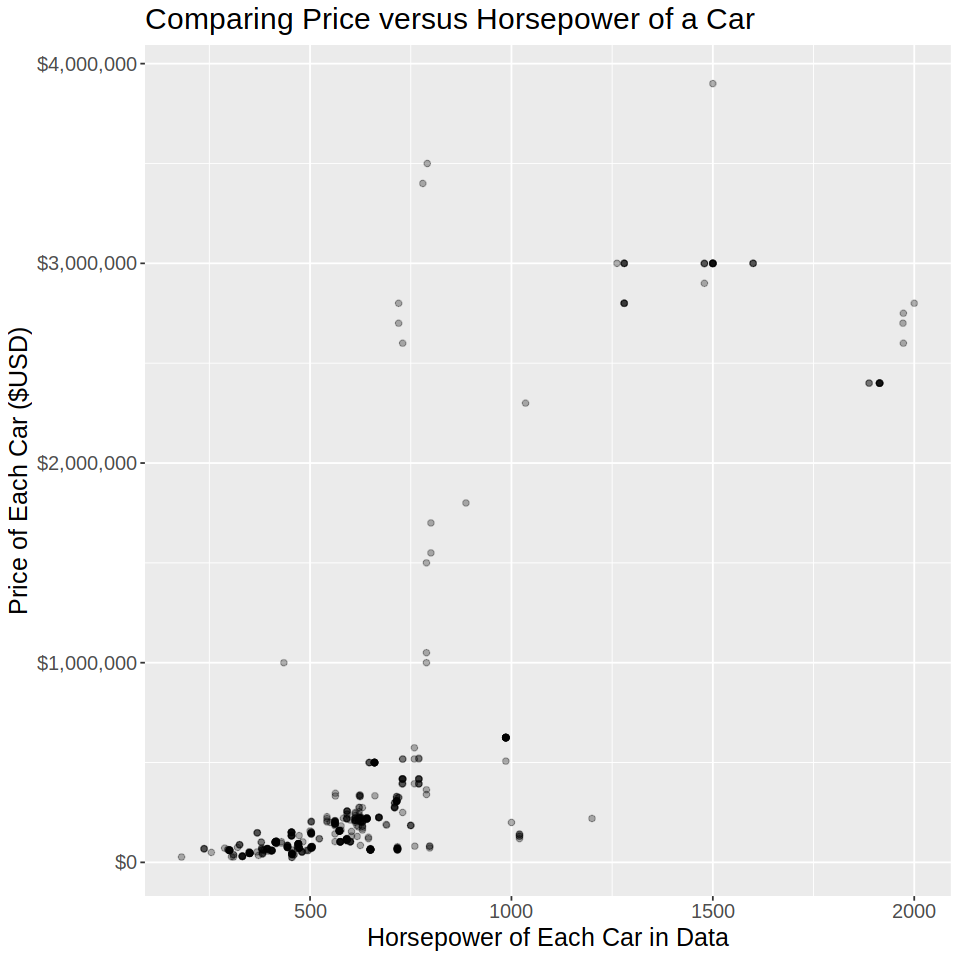

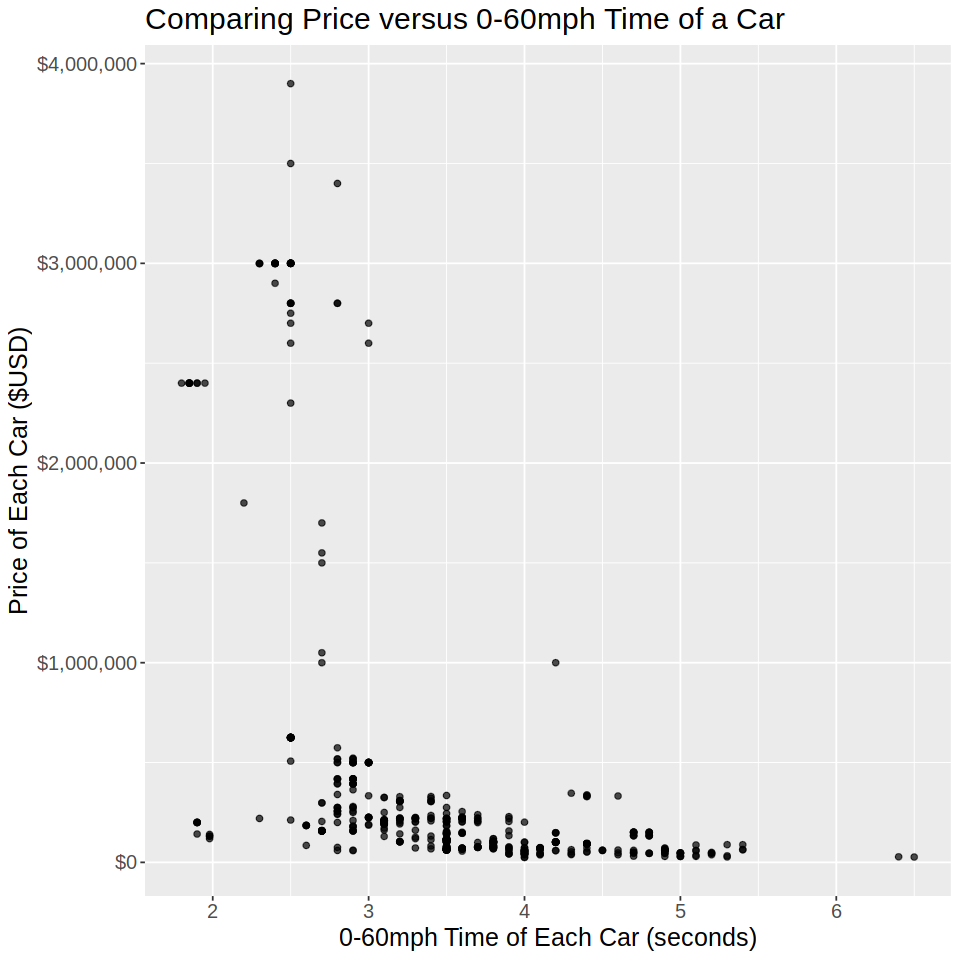

In [209]:
library(repr) # for setting the height and width of the plots 
# install.packages('png')
# library(png)


options(repr.plot.width = 8, repr.plot.height = 8)

car_plot1 <- car_training |>
    ggplot(aes(x = horsepower, y = price_in_usd)) +
    geom_point(alpha = 0.3) +
    xlab("Horsepower of Each Car in Data") +
    ylab("Price of Each Car ($USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 15)) +
    ggtitle("Comparing Price versus Horsepower of a Car")

car_plot1

car_plot2 <- car_training |>
    ggplot(aes(x = x0_60_mph_time_seconds, y = price_in_usd)) +
    geom_point(alpha = 0.7) +
    xlab("0-60mph Time of Each Car (seconds)") +
    ylab("Price of Each Car ($USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 15)) +
    ggtitle("Comparing Price versus 0-60mph Time of a Car")

car_plot2
## The graphs tell us that the relationship between horspower and price is positive and increasing, but perhaps not so linear; this is a means to use KNN regression to predict price
## The graphs tell us that the relationship between 0-60mph time and price is negative and decreasing, but perhaps not so linear; this is another means to use KNN regression to predict price



## Methods in Conducting Our Analysis 

### How will we conduct our analysis? What variables will we consider?

For our analysis we have chose to consider the predictor variables: age, education, hours working per week, occupation, and gender. We believe that each variable is important in classifying the income of an unknown individual, and makes for interesting analysis and debate. Considering the age variable, people may often expect that a higher age results in a higher income, simply because those with a lower age are focused primarily on school, and not on their working job. We hypothesize that age and income are closely related due to the aforementioned claim, and therefore include it as a predictor variable. We also chose education as a predictor variable as papers such as [this one]("https://www.journals.uchicago.edu/doi/pdf/10.1086/259763") (UChicago Journal, 1971) often argue that education and income are closely related as there is a positive relationship between them in the sense that as one reaches a higher level of education, they attain a higher income as well. Well, our preliminary plot made above already suggests that those with a Bachelor's degree most often attain an income of greater than 50000 dollars, but this can be further justified in our actual analysis. Hours worked per week and occupation are also closely related to income (we hypothesize) as a job and the hours worked are closely related to one's income. We firmly believe that one who does not work much and has a job that is of lesser significance relative to the others will make less money yearly. Gender is an interesting variable as it has been debated whether or not women and men should receive equal pay, so we decided to include this variable to demonstrate how this debate can be represented with data. The plot above shows that for the people who make above 50000 dollars per year, the vast majority are men, which is evidence for more men making more money, but also simply that more men are referenced in the dataset, as men also dominate for the class of people who make less than 50000 dollars per year. We will conduct our analysis using the KNN algorithm, as we wish to classify a categorical variable, and not a numerical variable. We will demonstrate our accuracy using a variety of K values, and use the K value with the highest accuracy for analysis. 

### How will we visualize our results?

Since we are comparing categorical variables with respect to a quantitative variable such as education. It would be rather important to plot a graph as shown above to indicate how the predictor variables compare and how the credit scores compare across the various educations listed. When picking the correct value for 'k' in our classifications, we can also plot accuracy versus k value to demonstrate which 'k' value to use in our classifier, considering solely accuracy in that case, which will prove to be significant in our classification. While this may seem cumbersome, our group may also attempt to plot a scatter plot which demonstrates income vs education and is colored by the credit score class, to demonstrate the distance between the data points more clearly, which will showcase the way in which our KNN classifier is working with the given data. Something to keep in mind is that our group will be up-sampling the data in order to improve the distributions of the credit scores within the raw data set (as of right now, high credit scores overpower the average and low credit scores), this will allow for better distribution of data and better analysis as well as there will be more to our classifier than predicting a high credit score the majority of the time. 

## Expected Outcomes and Significance

### What do we expect to find?

Judging via the raw data, our group expects that a higher education leads to a higher credit score, signifying a positive correlation between the two, and a high income also leading to a higher credit score. However, our group hypothesizes that even an individual who has only received a high school diploma or an associate's degree will attain a high credit score, given that they have a high income. On the other hand we predict that an individual with a higher education (master's degree and above), but a relatively mediocre yearly income (compared to the rest of the incomes in the raw data; so about $70,000), will still attain a high credit score. 

### What impact could such findings have?

If our group is able to identify a positive correlation between income, education, and credit score, our results would be able to support citations such as the two papers mentioned in the aforementioned cell. Findings listed above could spark debate as to whether or not kids should be taught more about their finances and handling their credit scores in high school, as it may be the case that kids who obtain only a high school degree with a low yearly income will have a lower credit score, negatively impacting their overall way of life. If however we find that individuals with a higher education degree and a low or average income will still have a higher credit score, we may be able to rebuttal against [the first paper cited](https://www.federalreserve.gov/econres/notes/feds-notes/are-income-and-credit-scores-highly-correlated-20180813.html), and argue that income and credit score are not as closely related as they may seem. 

### What future questions could this lead to?

As mentioned earlier, our predictive question and potential findings may lead to questions regarding whether or not kids should be taught more heavily the impacts of credit scores and keeping up with debts, maybe instead of sciences or mathematics. Our results could lead to questions of whether or not the education system (in the place where this data was conducted) is teaching their students well enough about the impact of not repaying debts, and how that may negatively affect their credit scores. More generally, our results could lead to questions of how income and education (when considered together) impact one's credit score; does higher income and higher education mean high credit score, what about high education and low income, and vice versa?